In [20]:
# In this problem, you are given a histogram that consists of two Gaussians on a linear background.
# Your job is to fit it, based on the example of a single Guassian on top of a linear background in Fit-examples.ipynb

In [12]:
# Boilerplate
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

In [13]:
binloc=np.array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
       27., 29., 31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51.,
       53., 55., 57., 59., 61., 63., 65., 67., 69., 71., 73., 75., 77.,
       79., 81., 83., 85., 87., 89., 91., 93., 95., 97., 99.])
hist = np.array([ 33.5,  35.5,  34.5,  37.5,  31.5,  30. ,  35. ,  29. ,  35.5,
        50.5,  53.5,  87.5, 101.5,  75. ,  44.5,  39.5,  35.5,  28.5,
        25.5,  20.5,  17.5,  26. ,  22. ,  17.5,  19. ,  15. ,  19. ,
        16. ,  21.5,  25. ,  22. ,  22.5,  37. ,  34.5,  33. ,  36. ,
        28. ,  26. ,  17.5,  11. ,  10. ,  10.5,   7.5,   8. ,   7.5,
         4. ,   9. ,   6.5,   4. ,   3. ])
hist_error = np.array([4.09267639, 4.21307489, 4.15331193, 4.33012702, 3.96862697,
       3.87298335, 4.18330013, 3.80788655, 4.21307489, 5.02493781,
       5.17204022, 6.61437828, 7.12390342, 6.12372436, 4.71699057,
       4.44409721, 4.21307489, 3.77491722, 3.57071421, 3.20156212,
       2.95803989, 3.60555128, 3.31662479, 2.95803989, 3.082207  ,
       2.73861279, 3.082207  , 2.82842712, 3.27871926, 3.53553391,
       3.31662479, 3.35410197, 4.30116263, 4.15331193, 4.0620192 ,
       4.24264069, 3.74165739, 3.60555128, 2.95803989, 2.34520788,
       2.23606798, 2.29128785, 1.93649167, 2.        , 1.93649167,
       1.41421356, 2.12132034, 1.80277564, 1.41421356, 1.22474487])
Nbins = binloc.size

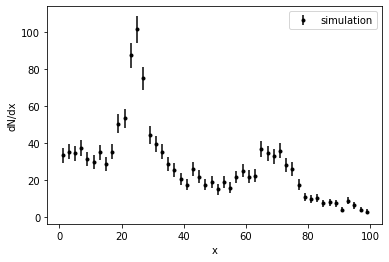

In [14]:
Nbins = binloc.size
plt.errorbar(binloc, hist, hist_error, fmt="k.", 
             label="simulation")
xl=plt.xlabel("x")
yl=plt.ylabel("dN/dx")
leg = plt.legend()

Best fit: Chi2/NDF=1.118
    a=3540.4 +- nan
    b=-3.07 +- 2763.060228
    N=518.3 +- 34.770302
    mu=24.64 +- 0.217797
    sig=3.157 +- 0.220535


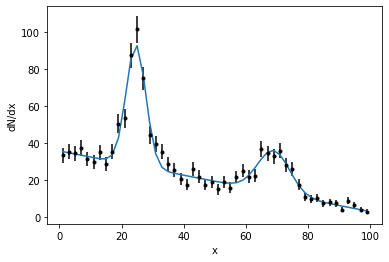

In [16]:
def sigfit(x,a,b,N,mu,sig):
    lin = a*x+b
    gauss = N*stats.norm.pdf(x,loc=mu,scale=sig)
    return lin+gauss

def two_model(x,a1,b1,N1,mu1,sig1,a2,b2,N2,mu2,sig2):
    return sigfit(x,a1,b1,N1,mu1,sig1) + sigfit(x,a2,b2,N2,mu2,sig2)

# Now let's fit it
# Guess
guess = np.array([40.,-1.,10.,30.,1., 30., -1., 5., 20., 1.])
#guess = None
par, cov = optimize.curve_fit(two_model, binloc, hist, 
            p0=guess,sigma=hist_error,absolute_sigma=True)
pred = two_model(binloc,par[0],par[1],par[2],par[3],par[4], par[5], par[6], par[7], par[8], par[9])
NDF = Nbins-11 # 5-parameter fit.  Normalization no longer a constraint
chi2 = ((pred-hist)**2/hist_error**2).sum()/NDF
perr = np.sqrt(np.diag(cov))
print('Best fit: Chi2/NDF=%.3f'%(chi2))
print('    a=%.1f +- %1f'%(par[0],perr[0]))
print('    b=%.2f +- %2f'%(par[1],perr[1]))
print('    N=%.1f +- %1f'%(par[2],perr[2]))
print('    mu=%.2f +- %2f'%(par[3],perr[3]))
print('    sig=%.3f +- %3f'%(par[4],perr[4]))
# Plot them both
plt.errorbar(binloc, hist, hist_error, fmt="k.", 
             label="simulation")
plt.plot(binloc,pred,label="best fit")
xl=plt.xlabel("x")
yl=plt.ylabel("dN/dx")